In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingClassifier as GBC
from sklearn.neighbors import KNeighborsClassifier
from ISLP import load_data

# Prevent warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Q7
In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500 . Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [2]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


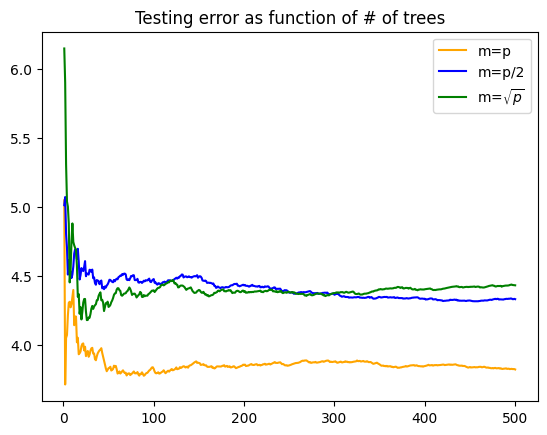

In [3]:
# Extract predictors and features, then split data
y = Boston['medv']
X = Boston[Boston.columns.drop('medv')]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

def rf(m, n):
    results=pd.DataFrame(columns=['p','p/2','sqrt(p)'])
    # Fit a random forest model for each number of predictors possible
    for i in m:
        values_i=[]
        # Fit models with varying # of trees
        for j in range(1,n+1):
            rf_boston = RF(max_features=i, n_estimators=j, random_state=0)
            rf_boston.fit(X_train, y_train)
            pred = rf_boston.predict(X_test)
            error = np.sqrt(mean_squared_error(y_test, pred))
            values_i.append(error)
        if i==12:
            results['p']=values_i
        elif i==6:
            results['p/2']=values_i
        else:
            results['sqrt(p)']=values_i
    
    results.index = results.index + 1
    return results

predictors = [12,6,3]
rf_results = rf(predictors,500)

# Plot the results 
plt.plot(rf_results.index.values, rf_results['p'], color='orange', label='m=p')
plt.plot(rf_results.index.values, rf_results['p/2'], color='blue', label='m=p/2')
plt.plot(rf_results.index.values, rf_results['sqrt(p)'], color='green', label=r'm=$\sqrt{p}$')
plt.title('Testing error as function of # of trees')
plt.legend();

>- We see that the bagging performs the worst, indicating that only a subset of features is relevant for predicting the median value of owner occupied homes.
>- Random forests that use decision trees with 3 & 6 predictors are closely matched in terms of performance. They may diverge for larger values of n, but it cannot be explored due to computational costs. 

#### Q11
This question uses the Caravan data set.

In [4]:
Caravan = load_data('Caravan')
Caravan['Purchase'] = Caravan['Purchase'].replace({'Yes':1,'No':0}).astype(int) # One hot encoding
print("This dataset contains {0} observations".format(Caravan.shape[0]))
Caravan.head()

This dataset contains 5822 observations


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


(a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations

In [5]:
# Extract predictors and features, then split data
y = Caravan['Purchase']
X = Caravan[Caravan.columns.drop('Purchase')]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.1718, random_state=0)
print("There are {0} observations in the training set".format(X_train.shape[0]))

There are 1000 observations in the training set


(b) Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [6]:
boost_caravan = GBC(n_estimators=1000, learning_rate=0.01, random_state=0)

boost_caravan.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

In [7]:
predictors = list(Caravan.columns.drop('Purchase'))
feature_imp = pd.DataFrame({'importance':boost_caravan.feature_importances_}, index=predictors)
feature_imp.sort_values(by='importance', ascending=False)

,importance
PPERSAUT,0.147395
ALEVEN,0.081763
PBRAND,0.050916
MGEMOMV,0.037644
MOPLHOOG,0.036845
...,...
PAANHANG,0.000000
PWABEDR,0.000000
PMOTSCO,0.000000
PBESAUT,0.000000


> The most important predictors are : (1) Contribution car policies (2) Number of life insurances (3) Contribution fire policies (4) Avg size household (5) High level education

(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one?

In [8]:
probs = boost_caravan.predict_proba(X_test)[:, 1] # Find probability of class 1
pred_b = np.zeros(y_test.shape[0]) # Initialize array of predictions 

pred_b[probs > 0.2] = 1 # Update predictions based on threshold 

cm_b = confusion_matrix(y_test, pred_b)
cm_b_df = pd.DataFrame(cm_b, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
cm_b_df

,Predicted 0,Predicted 1
Actual 0,4326,206
Actual 1,246,44


>- 0.176 of the people predicted to make a purchase actually make one
>- Our model is significantly better at predicting customers that will not make a purchase